#### Preliminaries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path

__https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html__

#### Data loading, dropping production

In [29]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv')

In [34]:
X = data.loc[:, ['Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform']]
X.describe()

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.885714,9.823810,68.880952,15.285714,10.190476,292.714286,16.579524
std,0.708721,5.948521,45.167894,2.759400,6.439092,59.429069,6.543793
min,1.000000,0.100000,0.500000,10.000000,1.000000,210.000000,3.540000
25%,1.100000,4.900000,24.600000,14.000000,6.000000,245.000000,11.520000
50%,2.000000,10.000000,72.900000,16.000000,10.000000,273.000000,16.900000
75%,2.200000,15.100000,100.000000,17.000000,13.000000,340.000000,21.970000
max,2.900000,19.100000,160.000000,20.000000,21.000000,395.000000,29.250000


In [35]:
X=X.values

In [37]:
X=X/X.std(axis=0) 

array([[3.03625701, 0.01722605, 0.01134318, 7.05559536, 0.79568291,
        6.53483957, 0.55432998],
       [1.59042034, 0.17226047, 0.09074544, 5.94155399, 2.06877556,
        4.63818428, 0.90665836],
       [1.44583667, 0.3272949 , 0.43104083, 5.19885974, 1.90963898,
        4.22436859, 1.33258422],
       [3.03625701, 0.53400746, 0.492294  , 6.31290111, 0.95481949,
        4.70715357, 1.8039213 ],
       [4.19292635, 0.70626794, 0.55808445, 4.08481837, 1.59136582,
        4.08643002, 1.59095837],
       [1.59042034, 0.84407632, 0.88930529, 4.45616549, 1.11395607,
        4.79336517, 1.74441695],
       [3.03625701, 1.01633679, 0.53539809, 4.82751262, 2.06877556,
        4.1553993 , 2.35511947],
       [2.89167335, 1.20582331, 1.42924065, 4.82751262, 3.18273163,
        4.63818428, 2.3645149 ],
       [4.19292635, 1.39530983, 1.65383561, 5.19885974, 0.15913658,
        4.27609555, 2.26899476],
       [4.04834269, 1.5331182 , 0.8076344 , 5.94155399, 0.15913658,
        3.62088736, 2.6

In [41]:
y=np.squeeze(data.loc[:, ['Production']].values)
y

array([15.1 , 21.3 , 22.75, 15.72,  7.71, 22.67, 18.11, 24.3 , 24.04,
       25.11, 36.8 , 36.42, 39.59, 51.6 , 48.05, 51.72, 59.2 , 58.3 ,
       41.8 , 44.2 , 37.51])

In [42]:
np.shape(X)

(21, 7)

In [43]:
np.shape(y)

(21,)

In [50]:
eps = 5e-3  # the smaller it is the longer is the path


print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


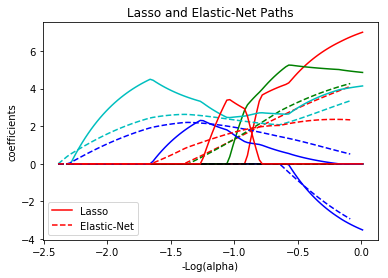

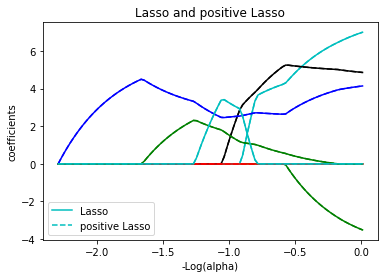

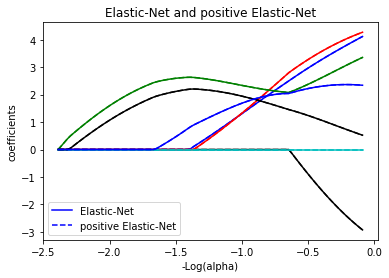

In [51]:
# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()
